<h1>Major Project- Visualizations - Haryana </h1>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<h2>India Dataset (Source: iamdevspk)</h2>

In [64]:
data = pd.read_csv('state_level_daily.csv')

patients_har=pd.read_csv('patients_data_hr.csv')


district_level=pd.read_csv('district_level_latest.csv')

data.shape
patients_har.shape

(1453, 27)

In [48]:
data.head(5)

,Unnamed: 0,Date,State,Confirmed,Deceased,Recovered,State_Name
0,0,01-Apr-20,AN,0,0,0,Andaman and Nicobar Islands
1,1,01-Apr-20,AP,67,0,1,Andhra Pradesh
2,2,01-Apr-20,AR,0,0,0,Arunachal Pradesh
3,3,01-Apr-20,AS,15,0,0,Assam
4,4,01-Apr-20,BR,3,0,0,Bihar


In [55]:
patients_har.head()

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,...,Source_1,Source_2,Source_3,Backup Notes,Num cases,Entry_ID,Num Cases,Address,latitude,longitude
0,7.0,NaN,4/3/2020,NaN,55.0,NaN,Gurugram,Gurugram,Haryana,HR,...,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,NaN,Italian tourist,1.0,NaN,NaN,"Gurgaon, India",28.459647,77.061922
1,8.0,NaN,4/3/2020,NaN,55.0,NaN,Gurugram,Gurugram,Haryana,HR,...,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,NaN,Italian tourist,1.0,NaN,NaN,"Gurgaon, India",28.459647,77.061922
2,9.0,NaN,4/3/2020,NaN,55.0,NaN,Gurugram,Gurugram,Haryana,HR,...,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,NaN,Italian tourist,1.0,NaN,NaN,"Gurgaon, India",28.459647,77.061922
3,10.0,NaN,4/3/2020,NaN,55.0,NaN,Gurugram,Gurugram,Haryana,HR,...,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,NaN,Italian tourist,1.0,NaN,NaN,"Gurgaon, India",28.459647,77.061922
4,11.0,NaN,4/3/2020,NaN,55.0,NaN,Gurugram,Gurugram,Haryana,HR,...,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,NaN,Italian tourist,1.0,NaN,NaN,"Gurgaon, India",28.459647,77.061922


<h2>Basic Statistics</h2>

In [37]:
data.describe()

,Unnamed: 0,Confirmed,Deceased,Recovered
count,4563.000000,4563.000000,4563.000000,4563.000000
mean,2281.000000,337.038133,9.268245,208.877931
std,1317.368969,1607.292009,54.071428,1110.055208
min,0.000000,-1295.000000,-1.000000,-19.000000
25%,1140.500000,0.000000,0.000000,0.000000
50%,2281.000000,8.000000,0.000000,1.000000
75%,3421.500000,111.000000,1.000000,52.000000
max,4562.000000,25561.000000,2004.000000,19999.000000


<h2>Haryana Data Subset</h2>

In [65]:
data_har=data.loc[data['State_Name'] == "Haryana"]

district_level_har=district_level.loc[district_level['State'] == "Haryana"]

In [52]:
data_har.head(5)

,Unnamed: 0,Date,State,Confirmed,Deceased,Recovered,State_Name
13,13,01-Apr-20,HR,0,0,10,Haryana
52,52,01-Jul-20,HR,393,4,527,Haryana
91,91,01-Jun-20,HR,265,1,7,Haryana
130,130,01-May-20,HR,18,0,6,Haryana
169,169,02-Apr-20,HR,6,0,0,Haryana


In [8]:
district_level_har.head(5)

,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,District_Notes,Last_Updated
211,0,HR,Haryana,HR_Foreign Evacuees,Foreign Evacuees,21,0,21,0,0,0,0,0,0,NaN,NaN
212,190,HR,Haryana,HR_Ambala,Ambala,392,55,332,5,0,0,0,0,0,NaN,NaN
213,191,HR,Haryana,HR_Bhiwani,Bhiwani,561,137,420,4,0,0,0,0,0,NaN,NaN
214,192,HR,Haryana,HR_Charkhi Dadri,Charkhi Dadri,89,32,56,1,0,0,0,0,0,NaN,NaN
215,193,HR,Haryana,HR_Faridabad,Faridabad,4926,980,3849,97,0,0,0,0,0,NaN,NaN


<h2> Task 2: Corellation Heat Map of Various parameters - Haryana </h2>

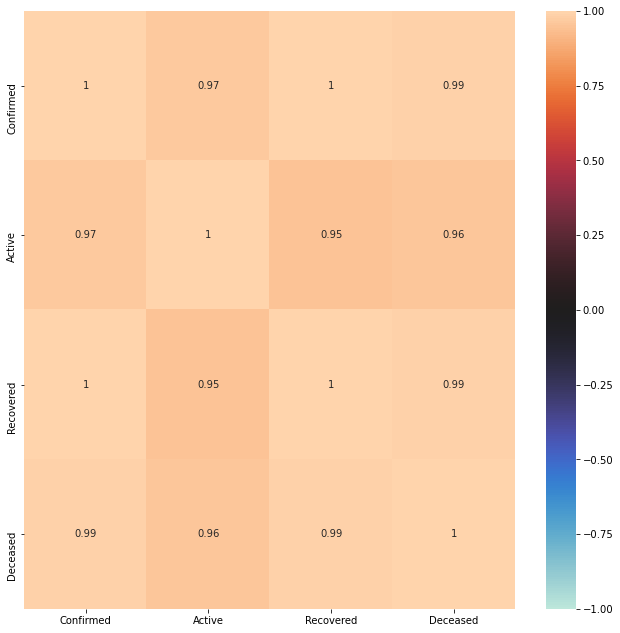

In [14]:
district_level_har = district_level_har[['Confirmed', 'Active', 'Recovered','Deceased']] 
corrmat = district_level_har.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat, annot = True, vmin=-1, vmax=1, center= 0) 


In [64]:
import folium
from folium.plugins import FastMarkerCluster

map1 = folium.Map(
    location=[29.0,76.35],
    tiles='cartodbpositron',
    zoom_start=7,
)

FastMarkerCluster(data=list(zip(patients_har['latitude'].values, patients_har['longitude'].values))).add_to(map1)
folium.LayerControl().add_to(map1)
map1


<h2>Scatter Plot of Confirmed Cases v/s Deceased</h2>

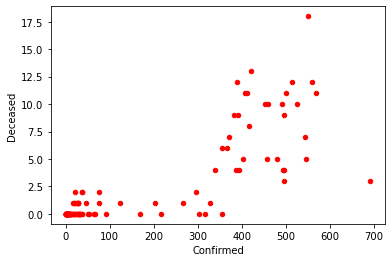

In [10]:
# a scatter plot comparing confirmed and deaths
data_har.plot(kind='scatter',x='Confirmed',y='Deceased',color='red')
plt.show()

<h2> Bar Graph of the Increase of the Confirmed Cases </h2>

In [18]:
data_har.dtypes

Unnamed: 0     int64
Date          object
State         object
Confirmed      int64
Deceased       int64
Recovered      int64
State_Name    object
dtype: object

C:\Users\HPpc\.conda\envs\geo_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


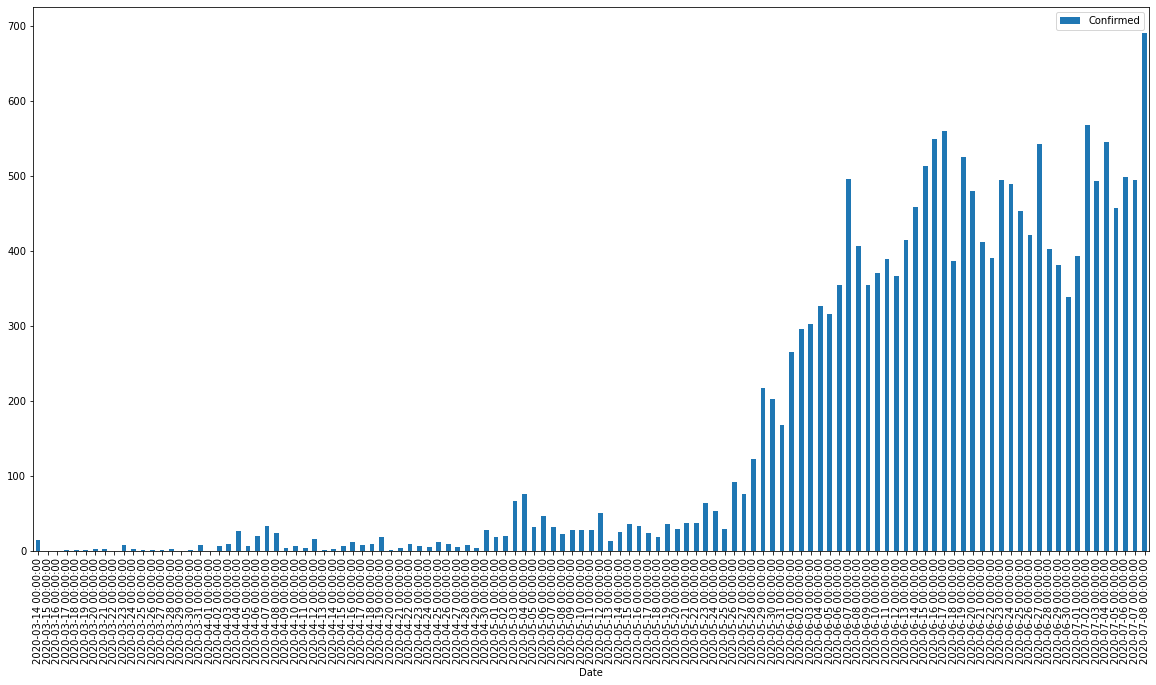

In [19]:
data_har['Date'] = pd.to_datetime(data_har['Date'])
data_har = data_har.sort_values(by="Date")
data_har.plot(kind='bar',x='Date',y='Confirmed', figsize=(20,10))

<h2> Line Plots of Confirmed v/s Cured </h2>

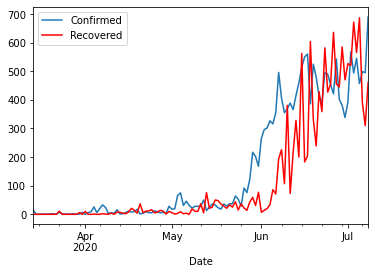

In [20]:
ax = plt.gca()

data_har.plot(kind='line',x='Date',y='Confirmed',ax=ax)
data_har.plot(kind='line',x='Date',y='Recovered', color='red', ax=ax)

plt.show()

<h2> Comparison of Situation(Confirmed Cases) of Haryana with other States </h2>


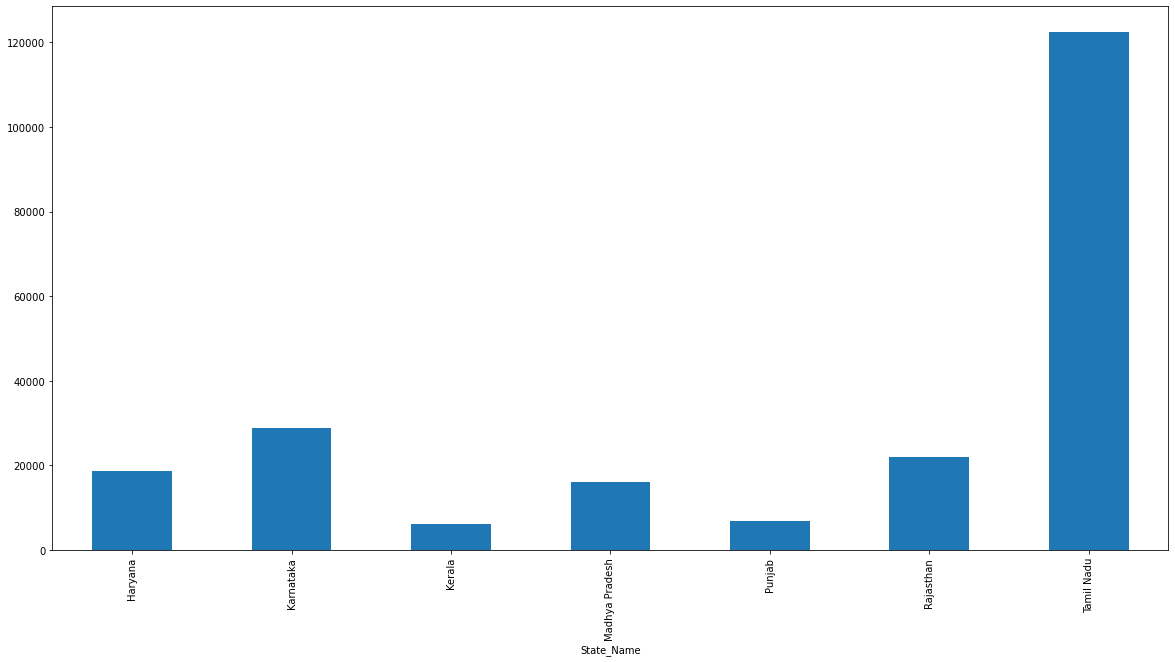

In [21]:
array = ['Haryana', 'Gujrat', 'Punjab', 'Kerala', 'Madhya Pradesh', 'Karnataka', 'Tamil Nadu', 'Rajasthan']
data_some=data.loc[data['State_Name'].isin(array)]
data2=data_some.groupby('State_Name')['Confirmed'].sum()
data2.plot(kind='bar',x='State_Name',y='Confirmed', figsize=(20,10))

<h2> Seaborn based Scatter Plot : Cured v/s Deaths in Haryana </h2>

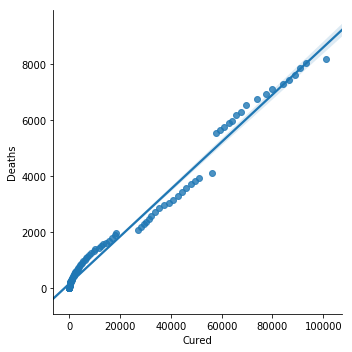

In [50]:
sns.lmplot(x='Cured', y='Deaths', data=data_har)

<h2> Task -4: Support vector machine classifier </h2>

In [18]:
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [19]:
cell_df = pd.read_csv('PAML_COVID_Dataset_up.csv')
cell_df.head()

,Gender_f,Age,Serious_sym,less_sym,most_comm_sym,status,severity_f
0,9,74,9,9,9,1,0
1,9,62,9,9,9,1,0
2,9,24,9,9,9,1,0
3,1,17,9,9,9,1,0
4,1,35,9,9,9,1,0


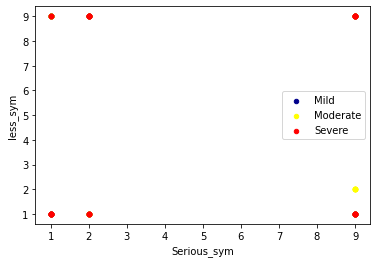

In [28]:
ax = cell_df[cell_df['severity_f'] == 0][0:50].plot(kind='scatter', x='Serious_sym', y='less_sym', color='DarkBlue', label='Mild');
cell_df[cell_df['severity_f'] == 1][0:50].plot(kind='scatter', x='Serious_sym', y='less_sym', color='Yellow', label='Moderate',ax=ax);
cell_df[cell_df['severity_f'] == 2][0:50].plot(kind='scatter', x='Serious_sym', y='less_sym', color='Red', label='Severe', ax=ax);

plt.show()

In [29]:
cell_df.dtypes

Gender_f         int64
Age              int64
Serious_sym      int64
less_sym         int64
most_comm_sym    int64
status           int64
severity_f       int64
dtype: object

In [30]:
X = dataset.iloc[:, 0:6].values
y = dataset.iloc[:, 6].values

In [32]:
print(X)
print(y)

[[ 9 74  9  9  9  1]
 [ 9 62  9  9  9  1]
 [ 9 24  9  9  9  1]
 ...
 [ 1 52  2  6  2  9]
 [ 1 55  2  6  2  9]
 [ 1 93  2  6  2  9]]
[0 0 0 ... 2 2 2]


In [33]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2508, 6) (2508,)
Test set: (627, 6) (627,)


In [54]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 

SVC(kernel='linear')

In [55]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 1, 2, 1], dtype=int64)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [57]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.28      0.10      0.15       204
           1       0.36      0.71      0.48       218
           2       0.34      0.21      0.26       205

    accuracy                           0.35       627
   macro avg       0.33      0.34      0.30       627
weighted avg       0.33      0.35      0.30       627

Confusion matrix, without normalization
[[ 20 132  52]
 [ 29 154  35]
 [ 22 139  44]]


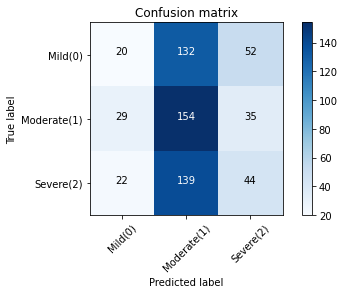

In [58]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Mild(0)','Moderate(1)','Severe(2)'],normalize= False,  title='Confusion matrix')



<h2> Task 3: Regression </h2>

In [66]:
data_har.head(5)

,Unnamed: 0,Date,State,Confirmed,Deceased,Recovered,State_Name
13,13,01-Apr-20,HR,0,0,10,Haryana
52,52,01-Jul-20,HR,393,4,527,Haryana
91,91,01-Jun-20,HR,265,1,7,Haryana
130,130,01-May-20,HR,18,0,6,Haryana
169,169,02-Apr-20,HR,6,0,0,Haryana


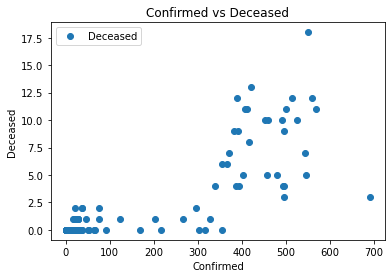

In [68]:
data_har.plot(x='Confirmed', y='Deceased', style='o')  
plt.title('Confirmed vs Deceased')  
plt.xlabel('Confirmed')  
plt.ylabel('Deceased')  
plt.show()

In [70]:
X = data_har['Confirmed'].values.reshape(-1,1)
y = data_har['Deceased'].values.reshape(-1,1)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [73]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [74]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[-0.11]
[[0.02]]


In [75]:
y_pred = regressor.predict(X_test)

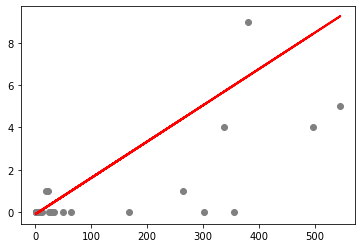

In [77]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [78]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.4822403308239183
Mean Squared Error: 5.493286923472937
Root Mean Squared Error: 2.3437762101943385


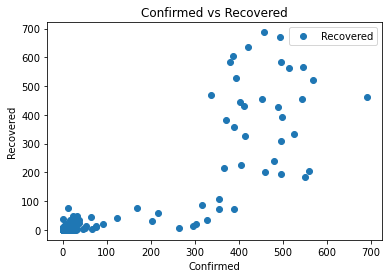

In [69]:
data_har.plot(x='Confirmed', y='Recovered', style='o')  
plt.title('Confirmed vs Recovered')  
plt.xlabel('Confirmed')  
plt.ylabel('Recovered')  
plt.show()

In [ ]:
X = data_har['Confirmed'].values.reshape(-1,1)
y = data_har['Recovered'].values.reshape(-1,1)

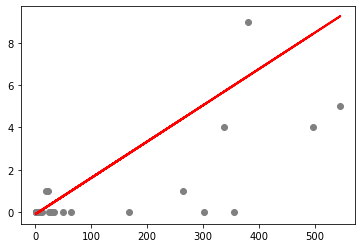

Mean Absolute Error: 1.4822403308239183
Mean Squared Error: 5.493286923472937
Root Mean Squared Error: 2.3437762101943385


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))